### Importando Libs

In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import mplfinance as fplt
import matplotlib.pyplot as plt
import bcb

### Coletando dados

In [76]:
ativo = ['MGLU3.SA']
ydata = yf.download(ativo, '2018-01-01', '2024-01-01')
df = pd.DataFrame(ydata)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.312315,33461800
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.360465,55940900
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.370094,37064900
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.402193,26958200
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.466389,28400000
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800


### Grafico do ativo na serie temporal pré-estabelecida

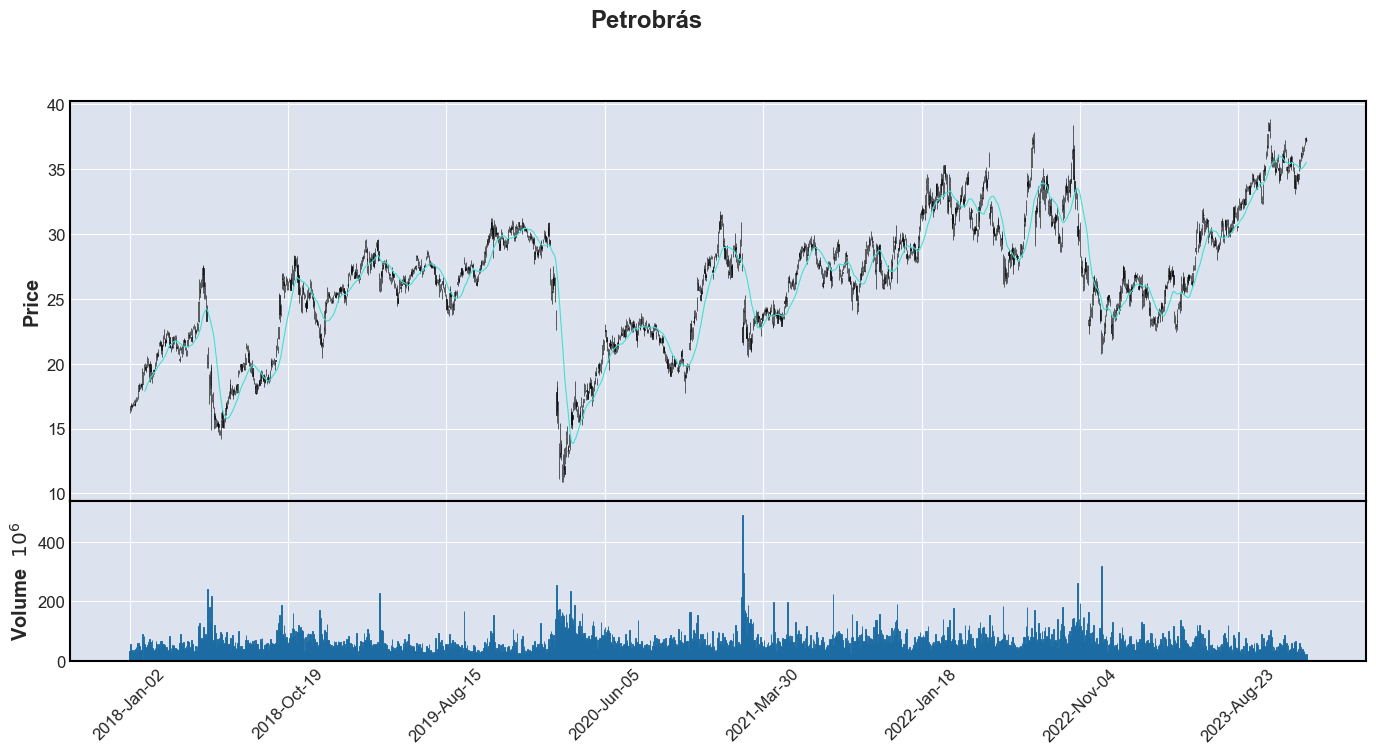

In [77]:
fplt.plot(
    df,title = 'Petrobrás', type = 'candle', volume = True, figsize = (18, 8), mav = 20
)

### Calculo da Média Móvel (não usada na apresentação)

In [78]:
df2 = df

def calcula_sma(precos, periodo):
    return precos.rolling(window=periodo).mean()

periodo_sma = 10
df2['MM'] = calcula_sma(df2['Adj Close'], periodo_sma)
df2

,Open,High,Low,Close,Adj Close,Volume,MM
Date,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.312315,33461800,NaN
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.360465,55940900,NaN
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.370094,37064900,NaN
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.402193,26958200,NaN
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.466389,28400000,NaN
...,...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900,31.103496
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700,31.301703
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800,31.563336


### Calcúlo de índice de força relativa (não usado na apresentação)

In [79]:
df2['RSL'] = (df['MM'] / df['Adj Close'] - 1) * 100

### Modelagem da primeira Onda de Elliott

A tendência de alta é encontrada ao subtrair o preço atual do preço do dia anterior. Foram plotadas colunas de indentificação das ondas, de contagem de altas e baixas

In [80]:
# Condição de Onda
df2['Fechamento Anterior'] = df2['Adj Close'].shift(1)
df2['Onda'] = np.where(df2['Adj Close'] > df2['Fechamento Anterior'], 1, 0)

# Cálculo da contagem contínua de ondas
count_onda1 = 0
contagem_ondas = []
count_perda = 0
contagem_perda = []

for i in range(len(df2)):
    if df2['Onda'].iloc[i] == 1:
        count_onda1 += 1
        contagem_ondas.append(count_onda1)
        count_perda = 0
    else:
        contagem_ondas.append(0)
        count_perda += 1
        count_onda1 = 0
    contagem_perda.append(count_perda)

df2['Contagem Onda'] = contagem_ondas
df2['Contagem Perda'] = contagem_perda

df2

,Open,High,Low,Close,Adj Close,Volume,MM,RSL,Fechamento Anterior,Onda,Contagem Onda,Contagem Perda
Date,,,,,,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.312315,33461800,NaN,NaN,NaN,0,0,1
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.360465,55940900,NaN,NaN,5.312315,1,1,0
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.370094,37064900,NaN,NaN,5.360465,1,2,0
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.402193,26958200,NaN,NaN,5.370094,1,3,0
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.466389,28400000,NaN,NaN,5.402193,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900,31.103496,-2.973336,32.047840,1,7,0
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700,31.301703,-3.285243,32.056648,1,8,0
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800,31.563336,-4.018219,32.364971,1,9,0


### Filtrando o DataFrame para apenas ondas de elliott

In [81]:
# Criar a coluna 'ONDA1' inicializada com 0
df2['ONDA1'] = 0

# Lógica para preencher a coluna 'ONDA1'
for i in range(len(df2)):
    if df2['Contagem Onda'].iloc[i] > 0 and (i == len(df2) - 1 or df2['Contagem Onda'].iloc[i + 1] == 0):
        df2['ONDA1'].iloc[i] = 1  # Sinal 1 se for o último valor da contagem de onda
    elif df2['Contagem Perda'].iloc[i] > 0 and (i == len(df2) - 1 or df2['Contagem Perda'].iloc[i + 1] == 0):
        df2['ONDA1'].iloc[i] = -1  # Sinal -1 se for o último valor da contagem de perda

# Remover os ONDA1 intermediários, mantendo apenas os últimos
df2['ONDA1'] = np.where(df2['ONDA1'] == 1, 1, np.where(df2['ONDA1'] == -1, -1, np.nan))

df2 = df2.dropna()

df2.head(5)

,Open,High,Low,Close,Adj Close,Volume,MM,RSL,Fechamento Anterior,Onda,Contagem Onda,Contagem Perda,ONDA1
Date,,,,,,,,,,,,,
2018-01-17,17.92,18.360001,17.809999,18.360001,5.893301,58488900,5.531549,-6.138354,5.665400,1,5,0,1.0
2018-01-18,18.35,18.530001,17.930000,18.219999,5.848361,48575800,5.579376,-4.599323,5.893301,0,0,1,-1.0
2018-01-22,18.26,18.469999,18.090000,18.469999,5.928608,33920000,5.671499,-4.336760,5.861202,1,2,0,1.0
2018-01-23,18.40,18.459999,18.000000,18.240000,5.854783,35567700,5.710338,-2.467116,5.928608,0,0,1,-1.0
2018-01-24,18.42,19.629999,18.420000,19.340000,6.207865,89768200,5.791869,-6.701116,5.854783,1,1,0,1.0


### Calculando as retrações de Fibonacci, necessárias para a indentificação da Onda2

In [82]:
df2['Retrações'] = np.nan  # Inicializa a coluna com NaN

# Cálculo das retrações
for x in range(2, len(df2)):  # Começa em 2 para evitar erros de índice
    prec_anterior = df2['Adj Close'].iloc[x - 1]
    prec_referencia = df2['Adj Close'].iloc[x - 2]
    
    if prec_referencia != 0:  # Evita divisão por zero
        retracao = (prec_anterior - df2['Adj Close'].iloc[x]) / (prec_anterior - prec_referencia) * 100
        df2['Retrações'].iloc[x] = retracao

df2.head(5)

,Open,High,Low,Close,Adj Close,Volume,MM,RSL,Fechamento Anterior,Onda,Contagem Onda,Contagem Perda,ONDA1,Retrações
Date,,,,,,,,,,,,,,
2018-01-17,17.92,18.360001,17.809999,18.360001,5.893301,58488900,5.531549,-6.138354,5.665400,1,5,0,1.0,NaN
2018-01-18,18.35,18.530001,17.930000,18.219999,5.848361,48575800,5.579376,-4.599323,5.893301,0,0,1,-1.0,NaN
2018-01-22,18.26,18.469999,18.090000,18.469999,5.928608,33920000,5.671499,-4.336760,5.861202,1,2,0,1.0,178.565669
2018-01-23,18.40,18.459999,18.000000,18.240000,5.854783,35567700,5.710338,-2.467116,5.928608,0,0,1,-1.0,91.997790
2018-01-24,18.42,19.629999,18.420000,19.340000,6.207865,89768200,5.791869,-6.701116,5.854783,1,1,0,1.0,478.263706


### Filtrando o DataFrame para apenas ondas de correção 

In [83]:
df3 = df2[df2['Retrações'].between(32.8, 50)]
df3 = df3.loc[df3['ONDA1'] == -1]
df3['Compra'] = (df3['Adj Close'] * df3['ONDA1']) * -1

df3.head(5)

,Open,High,Low,Close,Adj Close,Volume,MM,RSL,Fechamento Anterior,Onda,Contagem Onda,Contagem Perda,ONDA1,Retrações,Compra
Date,,,,,,,,,,,,,,,
2018-03-01,21.400000,21.459999,20.760000,21.030001,6.750333,66380900,6.661420,-1.317168,6.888358,0,0,3,-1.0,38.582352,6.750333
2018-03-07,21.690001,21.969999,21.370001,21.670000,6.955764,50956600,6.887394,-0.982928,7.029591,0,0,2,-1.0,41.284219,6.955764
2018-03-13,22.450001,22.540001,22.059999,22.110001,7.096998,34732800,7.004554,-1.302582,7.167615,0,0,2,-1.0,38.888522,7.096998
2018-04-25,22.010000,22.129999,21.670000,21.730000,6.975022,68160600,6.981442,0.092042,7.190082,0,0,2,-1.0,40.322618,6.975022
2018-07-16,17.950001,17.980000,17.600000,17.879999,5.750705,62798900,5.708250,-0.738245,5.824680,0,0,1,-1.0,32.857497,5.750705


### Transferindo a coluna Compra para o DataFrame principal

In [84]:
df['Compra'] = df3['Compra'] 
df

,Open,High,Low,Close,Adj Close,Volume,MM,RSL,Fechamento Anterior,Onda,Contagem Onda,Contagem Perda,ONDA1,Compra
Date,,,,,,,,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.312315,33461800,NaN,NaN,NaN,0,0,1,-1.0,NaN
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.360465,55940900,NaN,NaN,5.312315,1,1,0,NaN,NaN
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.370094,37064900,NaN,NaN,5.360465,1,2,0,NaN,NaN
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.402193,26958200,NaN,NaN,5.370094,1,3,0,NaN,NaN
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.466389,28400000,NaN,NaN,5.402193,1,4,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900,31.103496,-2.973336,32.047840,1,7,0,NaN,NaN
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700,31.301703,-3.285243,32.056648,1,8,0,NaN,NaN
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800,31.563336,-4.018219,32.364971,1,9,0,NaN,NaN


### Criando o Gráfico dos sinais de compra a partir do DataFrame principal

In [85]:
sinais = [
    fplt.make_addplot(df['Compra'], type = 'scatter', markersize = 50, marker = '^', color = 'r'),
]

In [86]:
ativo = ['MGLU3.SA']
ydata = yf.download(ativo, '2018-01-01', '2024-01-01')
df = pd.DataFrame(ydata)

[*********************100%%**********************]  1 of 1 completed


In [87]:
df['Compra'] = df3['Compra']
df

,Open,High,Low,Close,Adj Close,Volume,Compra
Date,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,5.312315,33461800,NaN
2018-01-03,16.490000,16.719999,16.370001,16.700001,5.360465,55940900,NaN
2018-01-04,16.780001,16.959999,16.620001,16.730000,5.370094,37064900,NaN
2018-01-05,16.700001,16.860001,16.570000,16.830000,5.402193,26958200,NaN
2018-01-08,16.740000,17.030001,16.709999,17.030001,5.466389,28400000,NaN
...,...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900,NaN
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700,NaN
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800,NaN


### Gráfico dos sinais de entrada do modelo

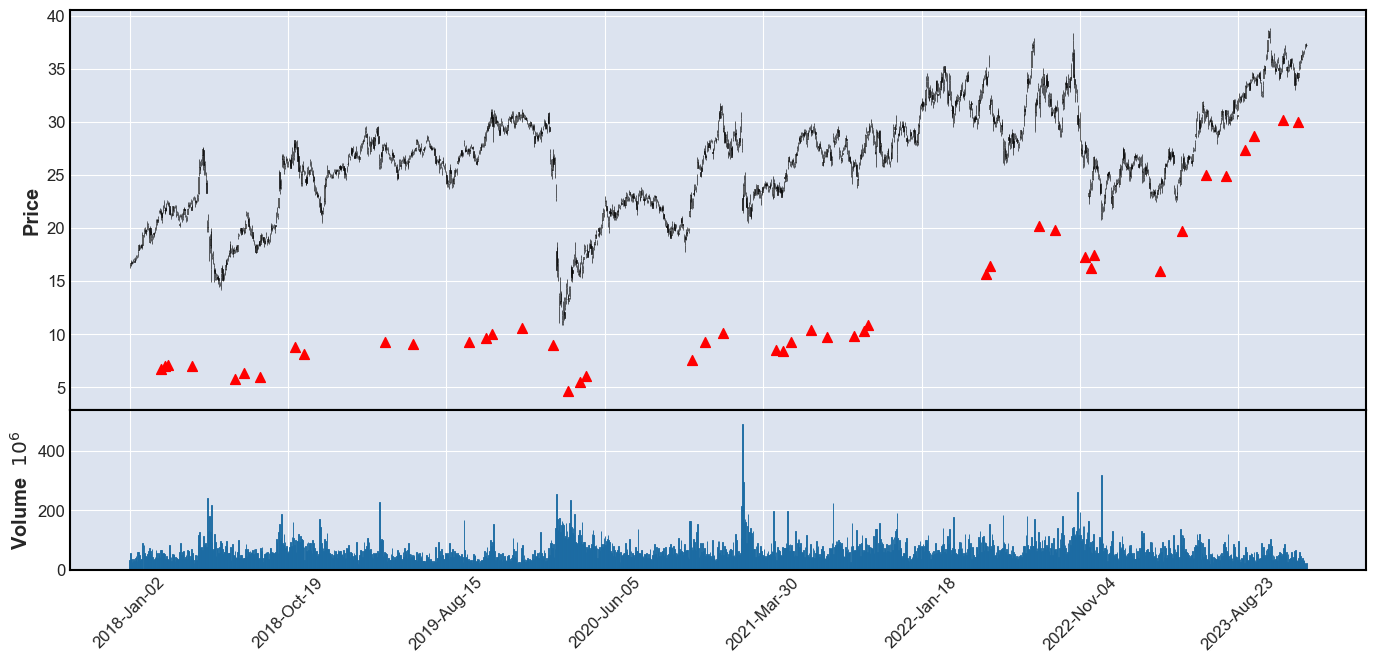

In [88]:
fplt.plot(
    df, type = 'candle', volume = True, addplot = sinais, figsize = (18, 8)
)

In [89]:
df = df.dropna()

### Criando o DataFrame para as regras de venda e Backtest

In [90]:
compra_preco = 0  # Variável para armazenar o preço de compra
df['Compra'] = (df['Adj Close'] * df3['ONDA1']) * - 1
df['Venda'] = (df['Compra']).shift(1)

backtest = pd.DataFrame()
backtest["Preco"] = df["Adj Close"]
backtest["Compra"] = df["Compra"]
backtest["Venda"] = df["Venda"]
backtest = backtest.dropna()

backtest

,Preco,Compra,Venda
Date,,,
2018-03-07,6.955764,6.955764,6.750333
2018-03-13,7.096998,7.096998,6.955764
2018-04-25,6.975022,6.975022,7.096998
2018-07-16,5.750705,5.750705,6.975022
2018-07-31,6.342502,6.342502,5.750705
2018-08-28,5.916633,5.916633,6.342502
2018-11-01,8.808848,8.808848,5.916633
2018-11-21,8.115620,8.115620,8.808848
2019-04-24,9.241934,9.241934,8.115620


### Retornos do modelo

In [91]:
backtest['Retorno'] = backtest['Compra'] - backtest['Venda']
backtest

,Preco,Compra,Venda,Retorno
Date,,,,
2018-03-07,6.955764,6.955764,6.750333,0.205431
2018-03-13,7.096998,7.096998,6.955764,0.141234
2018-04-25,6.975022,6.975022,7.096998,-0.121975
2018-07-16,5.750705,5.750705,6.975022,-1.224318
2018-07-31,6.342502,6.342502,5.750705,0.591797
2018-08-28,5.916633,5.916633,6.342502,-0.425869
2018-11-01,8.808848,8.808848,5.916633,2.892216
2018-11-21,8.115620,8.115620,8.808848,-0.693229
2019-04-24,9.241934,9.241934,8.115620,1.126314


In [92]:
np.array(backtest["Compra"])

array([ 6.95576382,  7.09699774,  6.97502232,  5.75070477,  6.34250212,
        5.91663265,  8.80884838,  8.11561966,  9.24193382,  9.10183144,
        9.24454975,  9.60049915, 10.05136776, 10.53494453,  9.01265335,
        4.60147047,  5.51830435,  6.0130477 ,  7.58046675,  9.22388554,
       10.08537769,  8.47217083,  8.40422058,  9.27325344, 10.38904953,
        9.70955563,  9.80662155, 10.31817245, 10.83730221, 15.6469326 ,
       16.39869499, 20.17770767, 19.77071762, 17.26519775, 16.2330265 ,
       17.41002083, 15.95408249, 19.66541672, 24.98705482, 24.9298954 ,
       27.37213707, 28.61824989, 30.13562584, 30.02172661])

In [93]:
np.array(backtest["Venda"])

array([ 6.75033283,  6.95576382,  7.09699774,  6.97502232,  5.75070477,
        6.34250212,  5.91663265,  8.80884838,  8.11561966,  9.24193382,
        9.10183144,  9.24454975,  9.60049915, 10.05136776, 10.53494453,
        9.01265335,  4.60147047,  5.51830435,  6.0130477 ,  7.58046675,
        9.22388554, 10.08537769,  8.47217083,  8.40422058,  9.27325344,
       10.38904953,  9.70955563,  9.80662155, 10.31817245, 10.83730221,
       15.6469326 , 16.39869499, 20.17770767, 19.77071762, 17.26519775,
       16.2330265 , 17.41002083, 15.95408249, 19.66541672, 24.98705482,
       24.9298954 , 27.37213707, 28.61824989, 30.13562584])

In [94]:
backtest.shape

(44, 4)

In [95]:
np.array(backtest["Venda"])

array([ 6.75033283,  6.95576382,  7.09699774,  6.97502232,  5.75070477,
        6.34250212,  5.91663265,  8.80884838,  8.11561966,  9.24193382,
        9.10183144,  9.24454975,  9.60049915, 10.05136776, 10.53494453,
        9.01265335,  4.60147047,  5.51830435,  6.0130477 ,  7.58046675,
        9.22388554, 10.08537769,  8.47217083,  8.40422058,  9.27325344,
       10.38904953,  9.70955563,  9.80662155, 10.31817245, 10.83730221,
       15.6469326 , 16.39869499, 20.17770767, 19.77071762, 17.26519775,
       16.2330265 , 17.41002083, 15.95408249, 19.66541672, 24.98705482,
       24.9298954 , 27.37213707, 28.61824989, 30.13562584])

In [96]:
np.array(backtest["Venda"])-np.array(backtest["Compra"])

array([-0.20543098, -0.14123392,  0.12197542,  1.22431755, -0.59179735,
        0.42586946, -2.89221573,  0.69322872, -1.12631416,  0.14010239,
       -0.14271832, -0.3559494 , -0.45086861, -0.48357677,  1.52229118,
        4.41118288, -0.91683388, -0.49474335, -1.56741905, -1.64341879,
       -0.86149216,  1.61320686,  0.06795025, -0.86903286, -1.11579609,
        0.6794939 , -0.09706593, -0.5115509 , -0.51912975, -4.80963039,
       -0.75176239, -3.77901268,  0.40699005,  2.50551987,  1.03217125,
       -1.17699432,  1.45593834, -3.71133423, -5.32163811,  0.05715942,
       -2.44224167, -1.24611282, -1.51737595,  0.11389923])

In [97]:
resultado = round(sum(np.array(backtest["Venda"])-np.array(backtest["Compra"])), 2)

### Resultado do backtest

In [98]:
print("Resultado por ação: R$ " + str(resultado))

Resultado por ação: R$ -23.27


<Axes: xlabel='Date'>

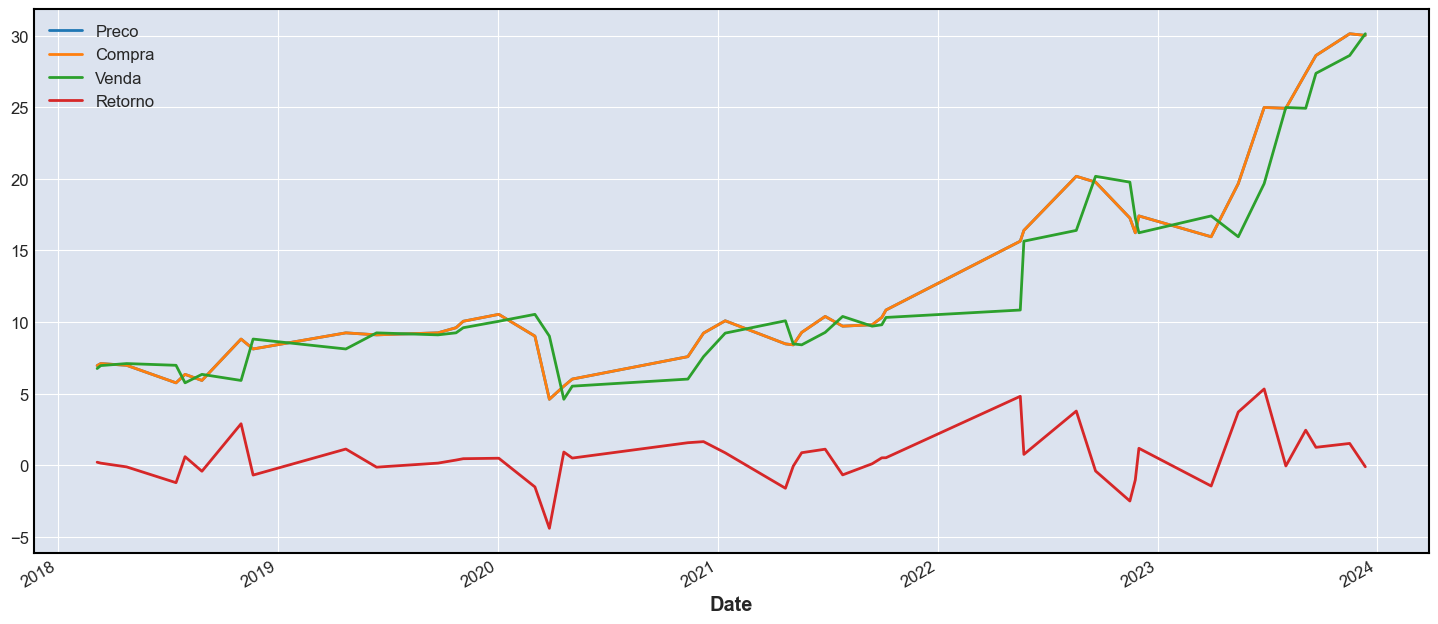

In [99]:
backtest.plot(figsize = (18,8))

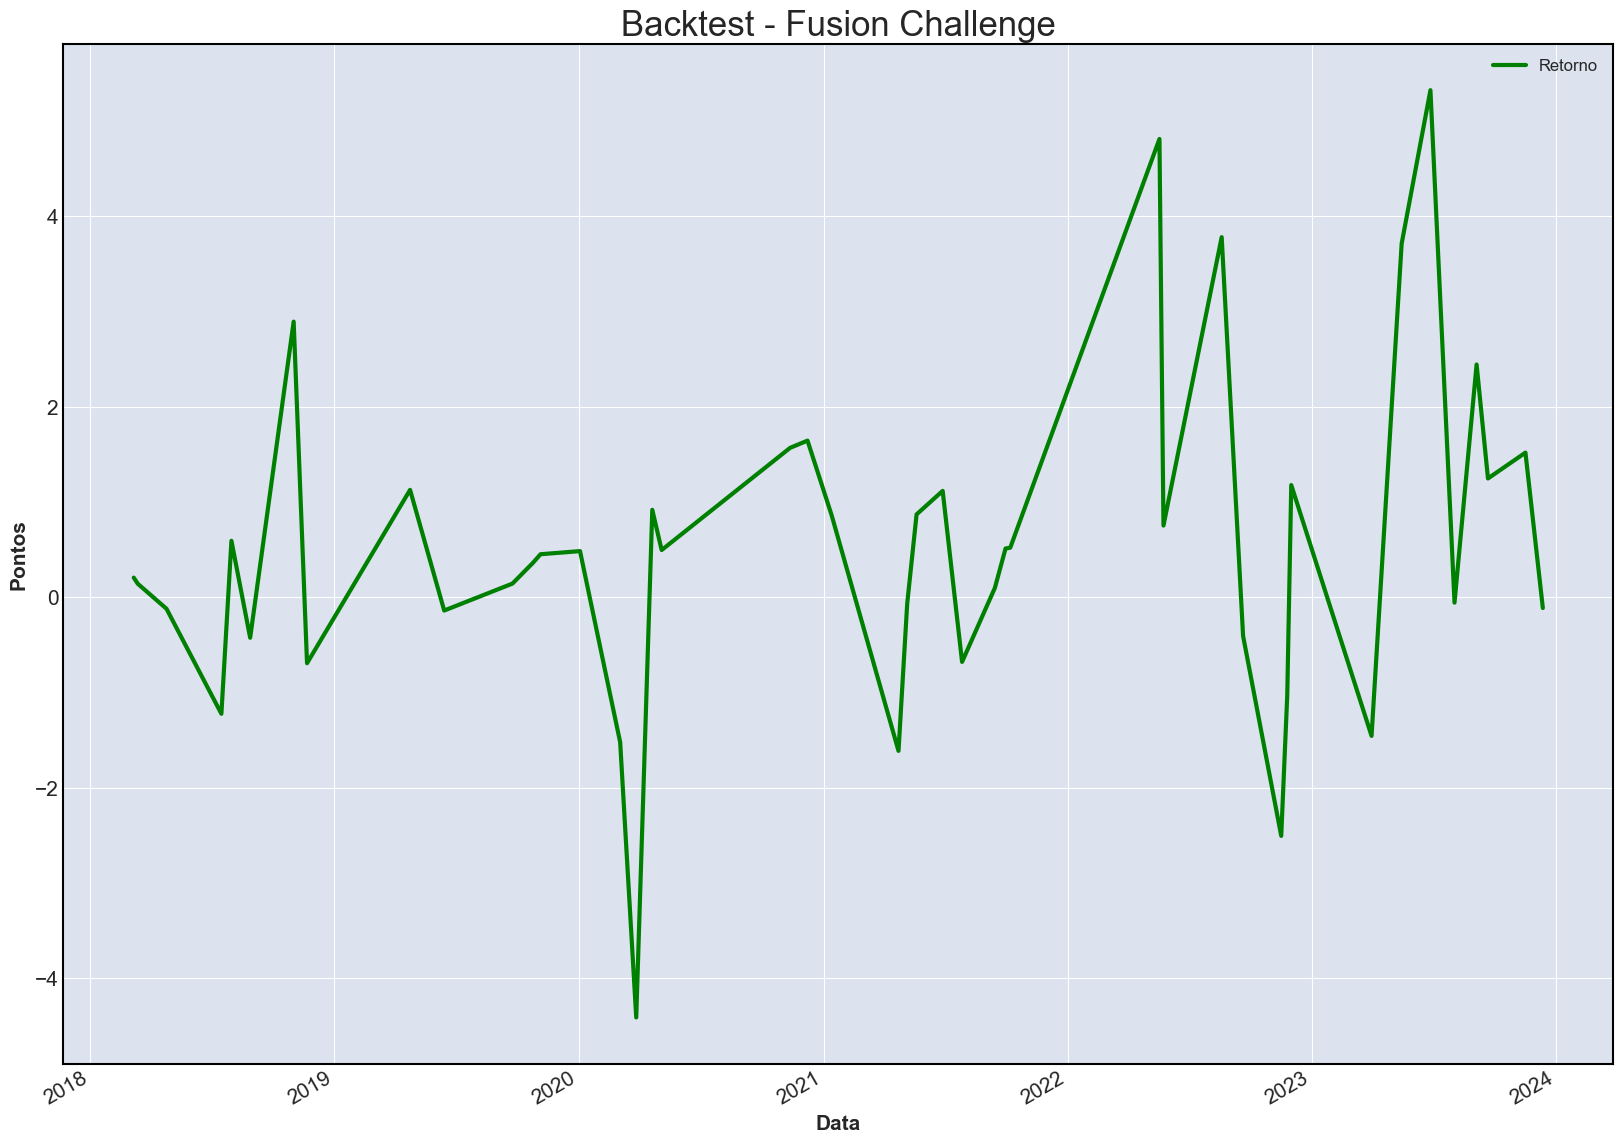

In [100]:
backtest["Retorno"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
plt.xlabel("Data"
           , fontsize = 15)
plt.ylabel("Pontos"
           , fontsize = 15)
plt.title("Backtest - Fusion Challenge"
           , fontsize = 25)
plt.legend()

In [101]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    cdi = pd.read_json(url)
    cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
    cdi.set_index('data', inplace=True)
    return cdi

In [102]:
consulta_bc(12)

,valor
data,
1986-03-06,18.72
1986-03-10,18.99
1986-03-12,18.51
1986-03-14,17.67
1986-03-17,18.75
...,...
2024-08-20,10.40
2024-08-21,10.40
2024-08-22,10.40


In [103]:
def cdi_acumulado(data_inicio, data_fim):
    cdi = consulta_bc(12)
    cdi_acumulado = (1 + cdi[data_inicio:data_fim] / 100).cumprod()
    cdi_acumulado.iloc[0] = 1
    return cdi_acumulado

In [104]:
cdi_DataFrame = pd.DataFrame()

cdi_DataFrame = cdi_acumulado('2018-01-01', '2024-01-01')
cdi_DataFrame

,valor
data,
2018-01-02,1.000000e+00
2018-01-03,1.142547e+00
2018-01-04,1.221269e+00
2018-01-05,1.305414e+00
2018-01-08,1.395357e+00
...,...
2023-12-22,7.386954e+46
2023-12-26,8.247534e+46
2023-12-27,9.208372e+46


In [105]:
benchmark = pd.DataFrame()
benchmark['Retorno'] = backtest['Retorno']
benchmark['CDI'] = cdi_DataFrame['valor']

benchmark


,Retorno,CDI
Date,,
2018-03-07,0.205431,1.922488e+01
2018-03-13,0.141234,2.486246e+01
2018-04-25,-0.121975,1.616904e+02
2018-07-16,-1.224318,5.189549e+03
2018-07-31,0.591797,1.025743e+04
2018-08-28,-0.425869,3.540419e+04
2018-11-01,2.892216,5.761425e+05
2018-11-21,-0.693229,1.212912e+06
2019-04-24,1.126314,8.179004e+08


### Retorno do modelo com o benchmark

<Axes: xlabel='Date'>

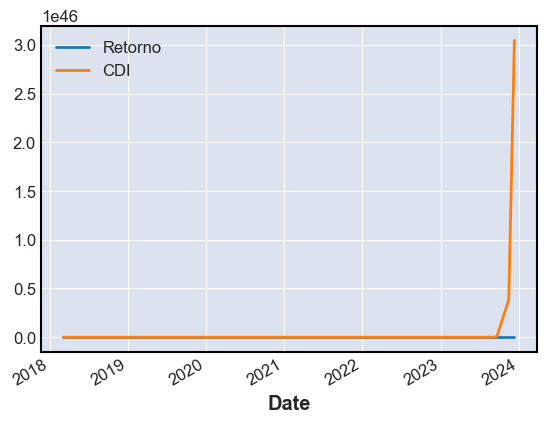

In [106]:
benchmark.plot()

### Metricas de risco

In [107]:
ddown = pd.DataFrame()

for ativo in benchmark.columns:
    list = []

    for ind in range(benchmark.count()[0]):
        list.append((benchmark[ativo].iloc[ind] / benchmark[ativo].iloc[:ind + 1].max()-1)*100)
    
    ddown[ativo] = list

ddown['Data'] = benchmark.index.values
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

Retorno   -695.975117
CDI          0.000000
dtype: float64


### DDown

<Axes: xlabel='Data'>

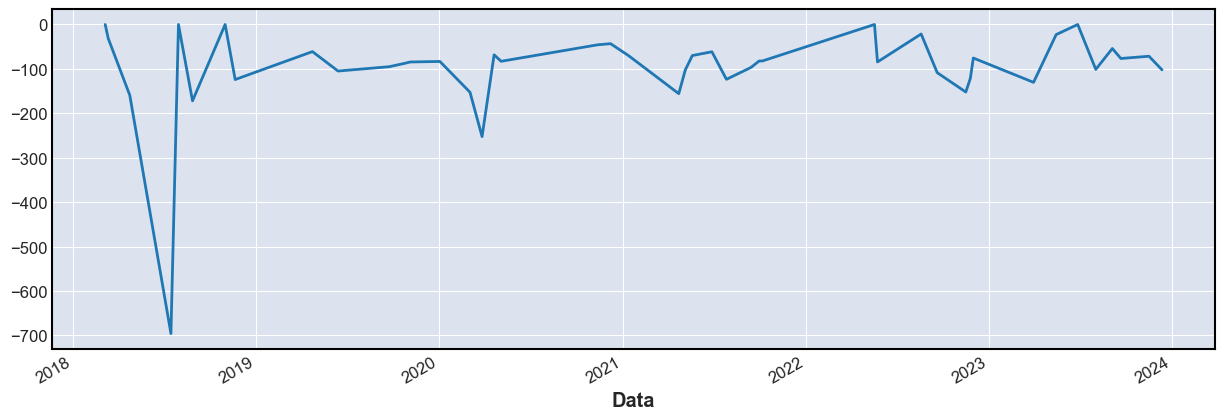

In [108]:
ddown['Retorno'].plot(figsize=(15,5))

### Volatividade anualizada

In [109]:
dados_chg = benchmark.pct_change()
dados_chg = dados_chg.fillna(0)

volatividade_anualizada = pd.DataFrame()
volatividade_anualizada = dados_chg.std()*np.sqrt(252)

print(f'Volatividade anualizada \n {volatividade_anualizada['Retorno']}')

Volatividade anualizada 
 117.79089232117038
